In [28]:
#import lubrary
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.integrate import quad
sns.set_theme()

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [73]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0

    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    sigma = 0.03
    mu = 0.5
    
    return ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (H - mu))**2))

second_prior = np.vectorize(gaussian_prior)


def third_prior(H):
    """
    two sharpy peak @ H =0 & H=1

    """
    if  H > 1 or H < 0:
        return 0
    sigma = 0.03
    mu = 0
    mu2 = 1
    return ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (H - mu))**2)) + ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (H - mu2))**2))


third_prior = np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

In [ ]:
'''
All functions work for a number not a vector so we must use this loop to get answers:

result = []
for h in H:
    result.append = func(h)

or we can use:
    func = np.vectorize(func)
    result = func(H)

Two results are same.
'''

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [75]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

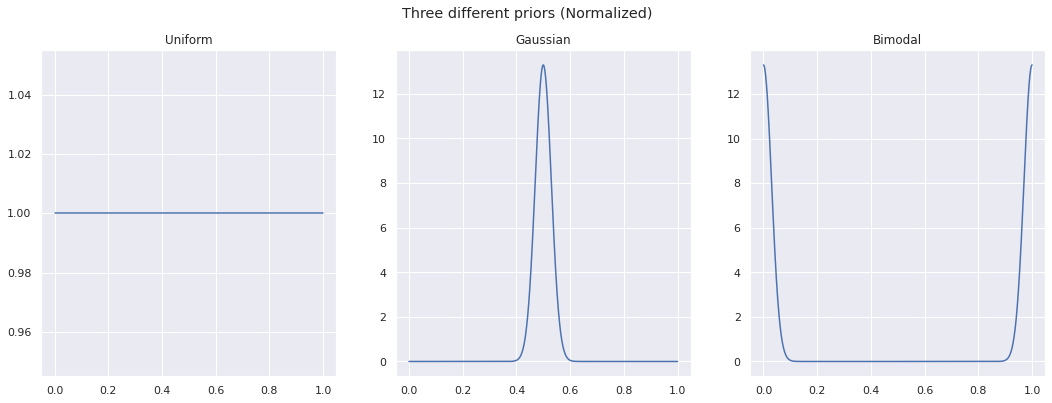

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Three different priors (Normalized)')

ax1.plot(H, first_prior(H))
ax1.set_title("Uniform")
ax2.plot(H, second_prior(H))
ax2.set_title("Gaussian")
ax3.plot(H, third_prior(H))
ax3.set_title("Bimodal")


plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

In [77]:
'''
If we use np.float64 or np.float32 get "invalid values encountered in true_divide" so for precision we use np.float128.
In following example we can see the difference of float32, float64 and float128.
'''

pi = 3.141592653589793238462643383279
print('16bit:' ,np.float16(pi))
print('32bit:' ,np.float32(pi))
print('64bit:' ,np.float64(pi))
print('128bit:' ,np.float128(pi))

16bit: 3.14
32bit: 3.1415927
64bit: 3.141592653589793
128bit: 3.141592653589793116


## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [78]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [79]:
def posterior(prior, data , H):

    def likelihood(data, H):
        r = sum(data)
        n = len(data)
        return (H**r)*((1-H)**(n-r))

    def prior_likelihood(H, data):
        return prior(H)*likelihood(data, H)
    
    def event(H, data):
        dh = H[1]-H[0]
        return sum(prior_likelihood(H[:-1], data))*dh

    return prior_likelihood(H, data)/event(H, data)

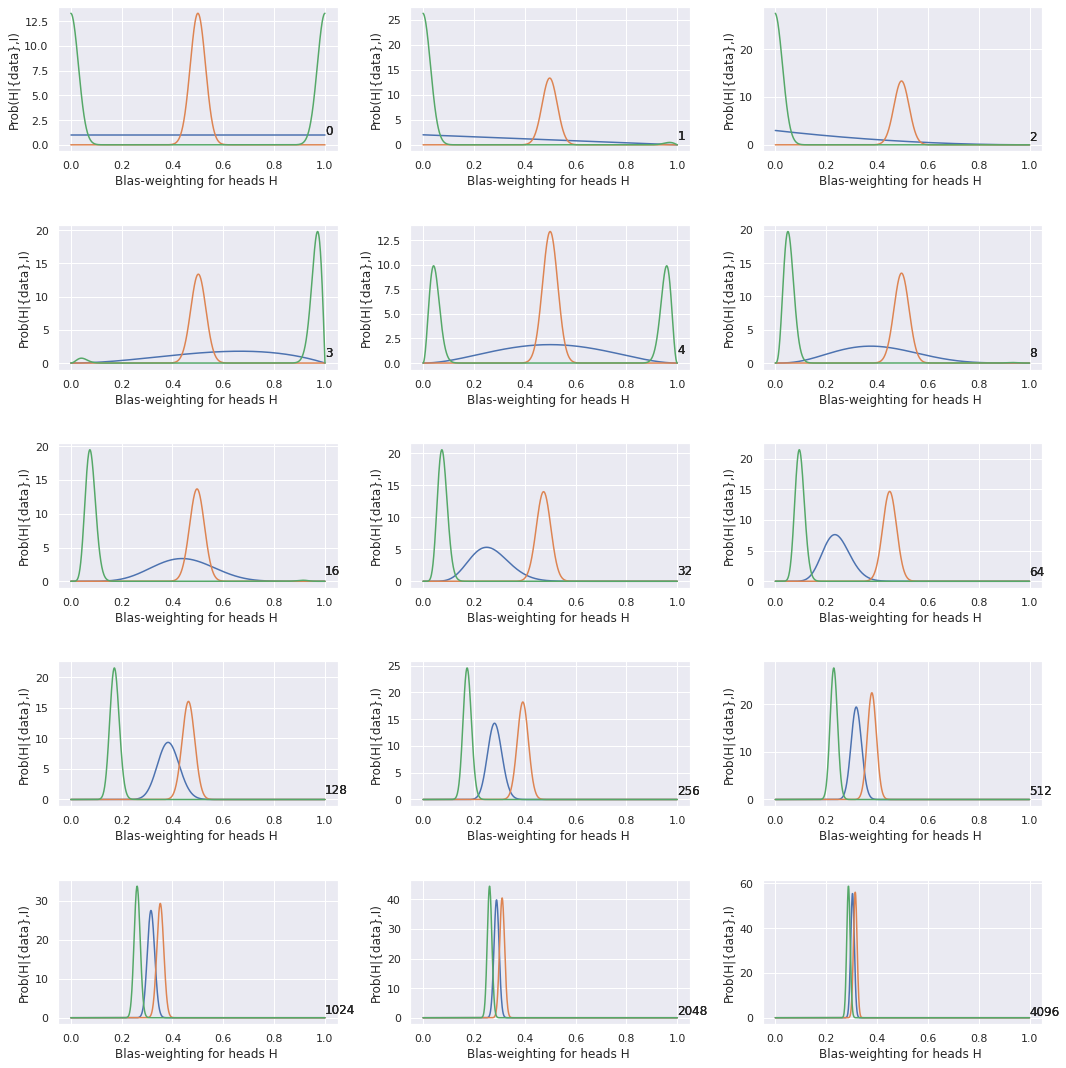

In [80]:
fig, axs = plt.subplots(5, 3, figsize= (15,15))
for i in range(15):
    for j in [first_prior , second_prior, third_prior]:
        axs.flatten()[i].plot(H, posterior(j, data[i], H))
        axs.flatten()[i].set(xlabel = "Blas-weighting for heads H ", ylabel = "Prob(H|{data},I)")
        axs.flatten()[i].text(1,1, str(len(data[i])))

plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [2]:
def raw_moment(x, r = 1):
    """calculate raw moment of x"""
    n = len(x)
    return (sum(i**r for i in x))/n

## (b)

Write a function to calculate central moments of a given distribution

In [3]:
def central_moment(x, r = 1):
    """calculate central moment of x"""
    xbar = x.mean()
    n = len(x)
    return (sum((i-xbar)**r for i in x))/n

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [4]:
binomial = np.random.binomial(30, 0.7, 10**6)
poisson = np.random.poisson(2.1, 10**6)
gaussian = np.random.normal(2.1 , 0.3 , 10**6)

In [5]:
print('for binomial:')
for i in range (1,4):
    print('raw moment',i, ':', raw_moment(binomial, i))
    print('central moment', i, ':', central_moment(binomial, i))

for binomial:
raw moment 1 : 21.001979
central moment 1 : 3.800280978794035e-15
raw moment 2 : 447.367257
central moment 2 : 6.284135083552419
raw moment 3 : 9657.074339
central moment 3 : -2.4819439177516625


In [6]:
print('for gaussian:')
for i in range (1,4):
    print('raw moment',i, ':', raw_moment(gaussian, i))
    print('central moment', i, ':', central_moment(gaussian, i))

for gaussian:
raw moment 1 : 2.1000674430636836
central moment 1 : -1.0227236835191889e-15
raw moment 2 : 4.500244175618825
central moment 2 : 0.08996091020251418
raw moment 3 : 9.828676627599513
central moment 3 : 1.2391216042752287e-05


In [7]:
print('for poisson:')
for i in range (1,4):
    print('raw moment',i, ':', raw_moment(poisson, i))
    print('central moment', i, ':', central_moment(poisson, i))

for poisson:
raw moment 1 : 2.100904
central moment 1 : -4.38380709510966e-15
raw moment 2 : 6.515628
central moment 2 : 2.1018303827898843
raw moment 3 : 24.6313
central moment 3 : 2.1111033552652883


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [ ]:
print('for binomial:')
for i in range (1,4):
    print('moment', i, ':', stats.moment(binomial,i))

for binomial:
moment 1 : 0.0
moment 2 : 6.2909908162559995
moment 3 : -2.565330204687841


In [ ]:
print('for gaussian:')
for i in range (1,4):
    print('moment', i, ':', stats.moment(gaussian,i))

for gaussian:
moment 1 : 0.0
moment 2 : 0.08995394737277296
moment 3 : 3.4688768269793e-05


In [ ]:
print('for poisson:')
for i in range (1,4):
    print('moment', i, ':', stats.moment(poisson,i))

for poisson:
moment 1 : 0.0
moment 2 : 2.0999177551910013
moment 3 : 2.098462687609963


##### As we can see Scipy calculates central moments.

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [9]:
data = pd.read_csv("data.txt", sep=('	'))
data.head()

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0


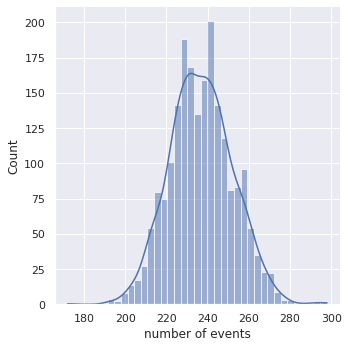

In [10]:
sns.displot(data['number of events'], kde = True)
plt.show()

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [11]:
data['total number'] = [sum(data['number of events'][:i]) for i in range(1, 2049)]
data['average number'] = data['total number']/data['# time passed']
data

,# time passed,number of events,total number,average number
0,7.5,232.0,232.0,30.933333
1,15.0,240.0,472.0,31.466667
2,22.5,245.0,717.0,31.866667
3,30.0,226.0,943.0,31.433333
4,37.5,223.0,1166.0,31.093333
...,...,...,...,...
2043,15330.0,265.0,484278.0,31.590215
2044,15337.5,220.0,484498.0,31.589112
2045,15345.0,252.0,484750.0,31.590094
2046,15352.5,229.0,484979.0,31.589578


In [12]:
data.to_csv('new_data.txt')

## (c)

Use a uniform prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

In [13]:
def uniform_prior(l):
    if l < 10  or l > 50:
        return 0
    return 1
    
prior_u = np.vectorize(uniform_prior)

In [14]:
def likelihood(data, l):
    m = int(data.mean()/7.5)
    return ((l**m)*np.exp(-l))/np.math.factorial(m)

In [15]:
def event(prior,likelihood ,l, data):
    dl = l[1]-l[0]
    return sum(prior(l)*likelihood(data, l[:-1]))*dl

In [24]:
def posterior(prior, likelihood, data , l):
    event = lambda l: prior(l)*likelihood(data, l)
    return (prior(l)*likelihood(data , l))/ quad(event, 10, 50)[0]

In [25]:
L = np.linspace(10,50,1000)

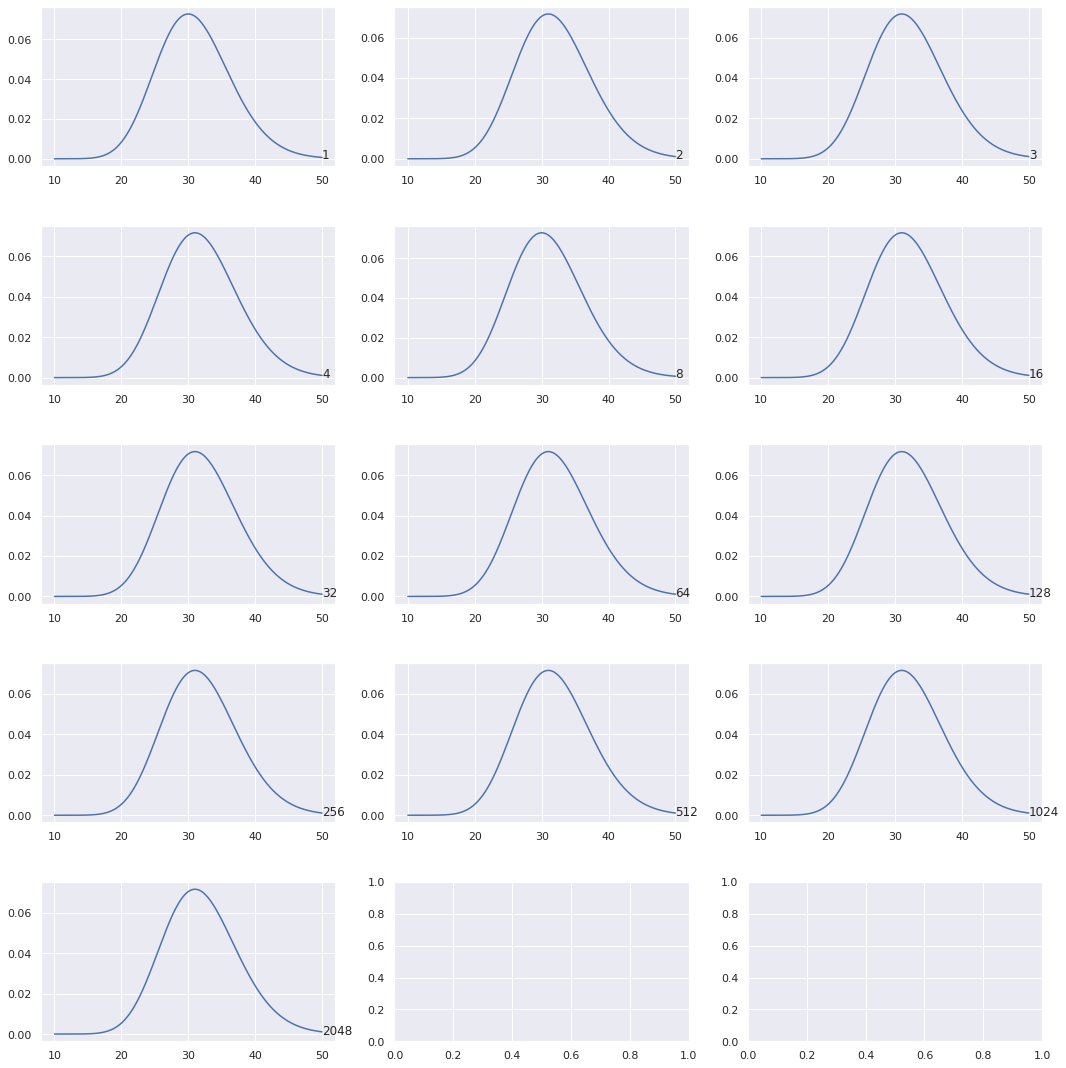

In [26]:
frame = [1,2,3,4,8,16,32,64,128,256,512,1024,2048]
fig, axs = plt.subplots(5, 3, figsize= (15,15))
for (i,j) in enumerate(frame):
        axs.flatten()[i].plot(L, posterior(prior_u, likelihood, data['number of events'][:j], L))
        axs.flatten()[i].text(50,0, str(j))
plt.tight_layout(h_pad=3)
plt.show()

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

In [22]:
def prior_g(l):
    if l < 10  or l > 50:
        return 0
    
    sigma = 5
    mu = 35
    
    return np.exp(-0.5 * (1 / sigma * (l - mu))**2)

prior_g = np.vectorize(prior_g)


def prior_b(l):
    if l < 10  or l > 50:
        return 0
    
    return np.exp(-l/10)

prior_b = np.vectorize(prior_b)

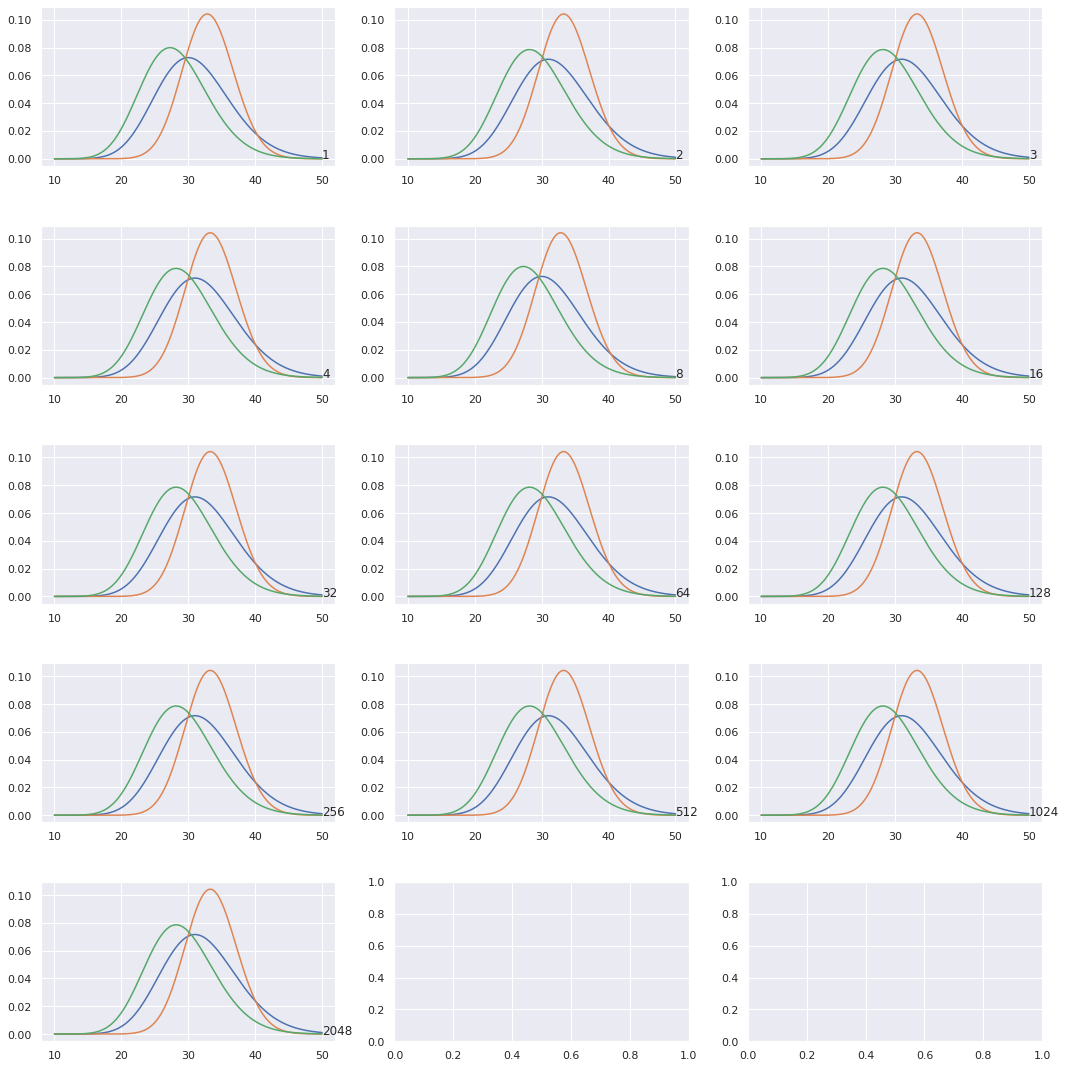

In [27]:
fig, axs = plt.subplots(5, 3, figsize= (15,15))
for (i,j) in enumerate(frame):
        axs.flatten()[i].plot(L, posterior(prior_u, likelihood, data['number of events'][:j], L))
        axs.flatten()[i].plot(L, posterior(prior_g, likelihood, data['number of events'][:j], L))
        axs.flatten()[i].plot(L, posterior(prior_b, likelihood, data['number of events'][:j], L))

        axs.flatten()[i].text(50,0, str(j))
plt.tight_layout(h_pad=3)
plt.show()

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

In [31]:
decayrate = 31
halftime = np.log(2)/decayrate
halftime

0.022359586469675653

##
best estimate:

Plutonium-227 n = 113 , z = 94

haft time = 20 ms

other:

Francium-219 n = 132 , z = 87
haft time = 20 ms
decay mode = alpha

Radium-201 n = 113 , z = 88
haft time = 20 ms
decay mode = alpha


# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.